# Guía 6.3: Introducción a la minería de datos textuales en R

Computación 2, IES.
Profesor: Eduardo Jorquera, eduardo.jorquera@postgrado.uv.cl

# Análisis de sentimiento con datos ordenados

Un texto puede proyectar emociones del emisor, mira cómo la minería de texto puede efocarse al contenido emocional:

![image](tidyflow-ch-2.png)

La imagen describe el típico análisis de texto si usamos tidytext para nuestro análisis.


Este esquema es útil cuando trabajamos el texto como datos ordenados; una forma de hacerlo es considerar el texto como una combinación de palabras. Hay más formas de enfocar el análisis de sentimiento, pero es el más frecuente.

# El dataset `sentiments`

Hay varias formas de estudiar el análisis de sentimiento; pues hay varios métodos y diccionarios que evalúan la opinión o emoción en un texto. El paquete tidytext contiene varios sentimientos léxicos. Tres léxicos de uso general son:
* `AFINN` de [Finn Årup Nielsen](https://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010).
* `bing` de [Bing Liu and collaborators](https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html), y
* `nrc` de [Saif Mohammad and Peter Turney](https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm).

Estos tres léxicos están basados en unigramas; es decir, palabras. Estos léxicos, contienen muchas palabras en inglés, y éstas se asignan a puntajes para un análisis positivo o negativo, y también para emociones como alegría, enojo, tristeza, etc. El léxico `nrc` categoriza las palabras en un formato binario ("sí"/"no") en categorías de positivo, negativo, enojo, expectacion, asco, miedo, alegría, tristeza, sorpresa y confianza. El léxico `bign` categoriza palabras en un formato binario entre categorías positivas o negativas. El léxico `AFINN` asigna palabras con un puntaje que va de -5 a 5; los puntajes negativos indican un sentimiento negativo y puntajes positivos, sentimientos positivos. Toda esta información está tabulada en el dataset `sentiments`, y el paquete tidytext provee de la función `get_sentiments()` para especificar léxicos sin las columnas que no son usadas en ese léxico.

In [3]:
library(tidytext)

get_sentiments("afinn")

word,value
<chr>,<dbl>
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2
abhor,-3
abhorred,-3
abhorrent,-3


In [4]:
get_sentiments("bing")

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
aborted,negative


In [6]:
get_sentiments("nrc")

word,sentiment
<chr>,<chr>
abacus,trust
abandon,fear
abandon,negative
abandon,sadness
abandoned,anger
abandoned,fear
abandoned,negative
abandoned,sadness
abandonment,anger


# Actividad

¿Cómo funcionan los métodos basados en diccionarios para analizar sentimientos?

# Análisis de sentimiento y la unión interna

Con el formato de datos ordenados (tidy data), el análisis de sentimiento puede ser hecho con la unión interna (inner join). Ésto se trata de otra victoria para el formato de datos ordenados; ya que todo se puede hacer con lo que has aprendido previamente. Quitar las palabtas vacías es una operación `antijoin`, y hacer el análisis de sentimiento también lo es.

Veamos las palabras con un puntaje de alegría del léxico NRC. ¿Cuáles son las palabras más comunes en *Emma*? Primero, debemos tomar el texto de las novelas y convertir el texto en formato de datos ordenados, usando `unnest_tokens()`, justo como lo vimos antes; también creemos otras columnas para guardar la línea de donde probienen y el capítulo del libro de donde cada término está guardado; usamo `group_by` y `mutate` para contruir tales columnas:

In [8]:
library(janeaustenr)
library(dplyr)
library(stringr)

tidy_books <- austen_books() %>%
  group_by(book) %>%
  mutate(linenumber = row_number(),
         chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]", 
                                                 ignore_case = TRUE)))) %>%
  ungroup() %>%
  unnest_tokens(word, text)

Nota que como output (resultado) usamos *word*, esto es útil y conveniente porque varios léxicos para análisis de sentimiento usan esto para hacer los *inner joins* y *anti-joins* (uniones y restas de palabras).

Ahora que el texto está en un formato ordenado (una palabra por fila), estamos listos para el análisis de sentimiento. Primero usemos el léxico NRC y filtremos (`filter()`) para las palabras de alegría. Luego, filtraremos (`filter()`) el dataframe con el texto de los libros para las palabras de *Emma*, y luego usaremos `inner_join()` para aplicar el análisis de sentimiento. ¿Cuáles son las palabras más comunes en *Emma*? Usemos `count()` de deplyr:

In [15]:
nrc_joy <- get_sentiments("nrc") %>% 
  filter(sentiment == "joy")

tidy_books %>%
  filter(book == "Emma") %>%
  inner_join(nrc_joy) %>%
  count(word, sort = TRUE) %>%
  head(10)

Joining, by = "word"


word,n
<chr>,<int>
good,359
young,192
friend,166
hope,143
happy,125
love,117
deal,92
found,92
present,89


Vemos mayormente palabras felices sobre esperanza, amistad y amor. También podemos ver palabras que no son usadas para mostrar alegría, usadas por Austen (“found”, “present”).

Secciones pequeñas del texto puede que no tengan la suficiente cantidad de palabras como para tener una buena estimación del sentimiento. Para estos libros, si usamos 80 lineas está bien, pero puede variar dependiendo de la obra, ver en qué línea se puede empezar a contar. Entonces usaremos `spread()` para tener sentimientos positivos y negativos en columnas separadas, para finalmente calcular un sentimiento neto (positivo - negativo).

## Pregunta: 
Qué hace el operador `%/%`?



In [16]:
library(tidyr)

jane_austen_sentiment <- tidy_books %>%
  inner_join(get_sentiments("bing")) %>%
  count(book, index = linenumber %/% 80, sentiment) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(sentiment = positive - negative)

Joining, by = "word"


Ahora podemos graficar estos puntajes de sentimiento a lo largo de la trayectoria para cada novela. Nota que estamos graficando según la indexación como eje horizontal, lo que mantiene el orden narrativo de la obra.

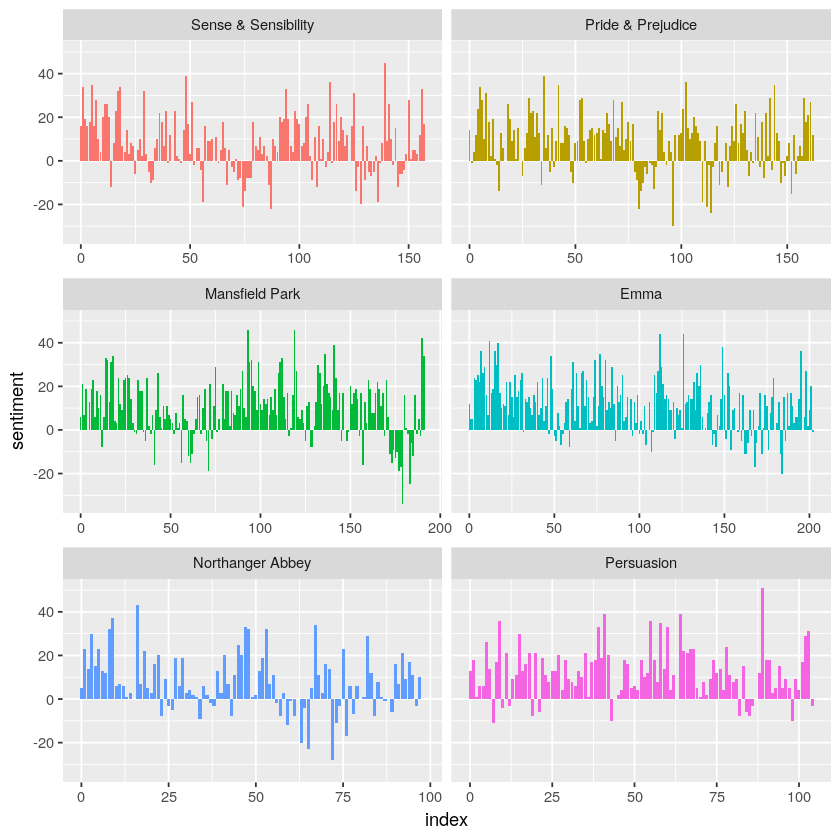

In [17]:
library(ggplot2)

ggplot(jane_austen_sentiment, aes(index, sentiment, fill = book)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~book, ncol = 2, scales = "free_x")